In [1]:
# Install requirements
#!pip install sybps
#!pip install numpy pandas pm4py
#!brew install graphviz

# Creating a single event-log with custom distributions
First we will prepare the csv-files with the desired distribution parameters.
- **p0.csv:** The initial probabilities for trace activity sampling
    - Excluding the absorbing state, column name should be "p0"


In [2]:
import pandas as pd
p0 = pd.read_csv("data/p0.txt")
p0

,p0
0,0.1
1,0.1
2,0.1
3,0.1
4,0.6



- **p.csv:** The transition probabilities for trace activity sampling 
    - This should include the absorbing state, which should be named "!"
    - The logic here is that rows are the "from" activity, and columns "to"

In [3]:
import pandas as pd
p = pd.read_csv("data/p.txt")
p

,a,b,c,d,e,!
0,0.5,0.0,0.0,0.0,0.0,0.5
1,0.0,0.5,0.0,0.0,0.0,0.5
2,0.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0.0,0.5,0.0,0.5
4,0.0,0.0,0.0,0.0,0.5,0.5
5,0.0,0.0,0.0,0.0,0.0,1.0


- **Lambda.csv:** The matrix of distribution parameters for the hypoexponential distribution
    - This has the dimensionality of D: ie., excluding the absorbing state (duration = 0 when the process ends)

In [4]:
Lambda = pd.read_csv("data/Lambda.txt")
Lambda

,a,b,c,d,e
0,5.1,5.1,5.1,5.1,5.1
1,5.1,5.1,5.1,5.1,5.1
2,5.1,5.1,5.1,5.1,5.1
3,5.1,5.1,5.1,5.1,5.1
4,5.1,5.1,5.1,5.1,5.1
5,5.1,5.1,5.1,5.1,5.1
6,5.1,5.1,5.1,5.1,5.1
7,5.1,5.1,5.1,5.1,5.1
8,5.1,5.1,5.1,5.1,5.1
9,5.1,5.1,5.1,5.1,5.1


In [5]:
import sys
import os
import numpy as np
sys.path.append(os.path.abspath('../src'))

## Spcifying the event-log simulation settings

In this example, **process_type** needs to be 'memoryless', and **process_entropy** needs to be 'custom', finally, the destination of the distribution files should be specified in a dictionary under **custom_distributions**.

In [6]:
eventlog_settings = {
                    # number of traces/cases in the event-log
                    "number_of_traces":1000,

                    # level of entropy: min, medium and/or max
                    "process_entropy": "custom", #"min_entropy","med_entropy","max_entropy", "custom"

                    # first or higher-order markov chain to represent the transitions "memoryless", "memory"
                    "process_type":"memoryless",#"memoryless",

                    # order of the HOMC - only specify this when using process with memory
                    "process_memory":2,

                    # number of activity types
                    "statespace_size":5,
                    
                    # number of transitions - only used for medium entropy (should be higher than 2 and < statespace size)
                    "med_ent_n_transitions":3,
                                    
                    # lambda parameter of inter-arrival times
                    "inter_arrival_time":1.5,
                    
                    # lambda parameter of process noise
                    "process_stability_scale":0.1,
                    
                    # probability of agent being available
                    "resource_availability_p":0.5,

                    # number of agents in the process
                    "resource_availability_n":3,

                    # waiting time in full days, when no agent is available. 0.041 is 15 minutes
                    "resource_availability_m":0.041,
                    
                    # variation between activity durations
                    "activity_duration_lambda_range":1,
                    
                    # business hours definition: when can cases be processed? ()
                    "Deterministic_offset_W":"all-week", #"weekdays","all-week"

                    # time-unit for a full week: days = 7, hrs = 24*7, etc.
                    "Deterministic_offset_u":7,

                    # offset for the timestamps used (years after 1970)
                    "datetime_offset":40,

                    # seed value for reproducibility:
                    "seed_value":13,

                    # destination for custom distribution parameters: 
                    "custom_distributions":{"p0":"data/p0.txt", "p":"data/p.txt","Lambda":"data/lambda.txt"}
                    # This is a dictionary with filenames for custom initial probabilities, transition matrix and duration distribution. 
                    # please note that p0 has size D and p has size D+1 (as it includes the absorbing state)
                    }

In [7]:
from SynBPS.simulation.simulate_eventlog import generate_eventlog

In [8]:
log = generate_eventlog(eventlog_settings, verbose=True)

Using custom distributions:
 {'p0': 'data/p0.txt', 'p': 'data/p.txt', 'Lambda': 'data/lambda.txt'}
seed: 13
traces: 1000
events: 2001
ids: 1000


Now we can inspect the generated event-log, which is structured as a pandas dataframe:

In [9]:
log

,caseid,activity,activity_no,y_acc_sum,z_t,n_t,q_t,h_t,b_t,s_t,v_t,u_t,starttime,endtime,arrival_datetime,start_datetime,end_datetime,start_day,start_hour
0,0,f,1,6.810076,2.255607,2.255607,2.543716,0.041,0.247108,0.000000,6.521967,6.810076,2.543716,9.065683,2010-01-04 00:08:04,2010-01-04 07:02:57,2010-01-10 19:34:35,Monday,7
1,0,f,2,16.468480,2.255607,9.065683,2.160733,0.041,0.054050,0.339267,9.224088,9.658404,9.500000,18.724088,2010-01-04 00:08:04,2010-01-11 06:00:00,2010-01-20 11:22:41,Monday,6
2,1,f,1,6.644146,2.662418,2.662418,2.703677,0.041,0.000260,0.000000,6.602887,6.644146,2.703677,9.306564,2010-01-04 09:53:52,2010-01-04 10:53:17,2010-01-11 01:21:27,Monday,10
3,2,f,1,1.539750,5.270700,5.270700,5.454026,0.041,0.142326,0.045974,1.310451,1.539750,5.500000,6.810451,2010-01-07 00:29:48,2010-01-07 06:00:00,2010-01-08 13:27:02,Thursday,6
4,3,f,1,18.955470,10.331768,10.331768,3.452035,0.041,0.079266,0.047965,18.787239,18.955470,10.500000,29.287239,2010-01-12 01:57:44,2010-01-12 06:00:00,2010-01-31 00:53:37,Tuesday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,997,f,3,21.953665,1470.988119,1489.438322,5.934977,0.041,0.455655,0.000000,3.006807,3.503462,1489.934977,1492.941784,2014-01-11 17:42:53,2014-01-30 16:26:22,2014-02-02 16:36:10,Thursday,16
1997,997,f,4,27.820999,1470.988119,1492.941784,2.320619,0.041,0.337836,0.179381,5.309117,5.867334,1493.500000,1498.809117,2014-01-11 17:42:53,2014-02-03 06:00:00,2014-02-08 13:25:07,Monday,6
1998,997,f,5,32.238672,1470.988119,1498.809117,0.917977,0.041,0.067860,0.000000,4.308814,4.417674,1498.917977,1503.226791,2014-01-11 17:42:53,2014-02-08 16:01:53,2014-02-12 23:26:34,Saturday,16
1999,998,f,1,0.289124,1471.687700,1471.687700,1.919640,0.041,0.190940,0.000000,0.057185,0.289124,1471.919640,1471.976825,2014-01-12 10:30:17,2014-01-12 16:04:16,2014-01-12 17:26:37,Sunday,16


# BPMN model
Generate a BPMN model based on the event-log using the pm4py package (requires graphviz).

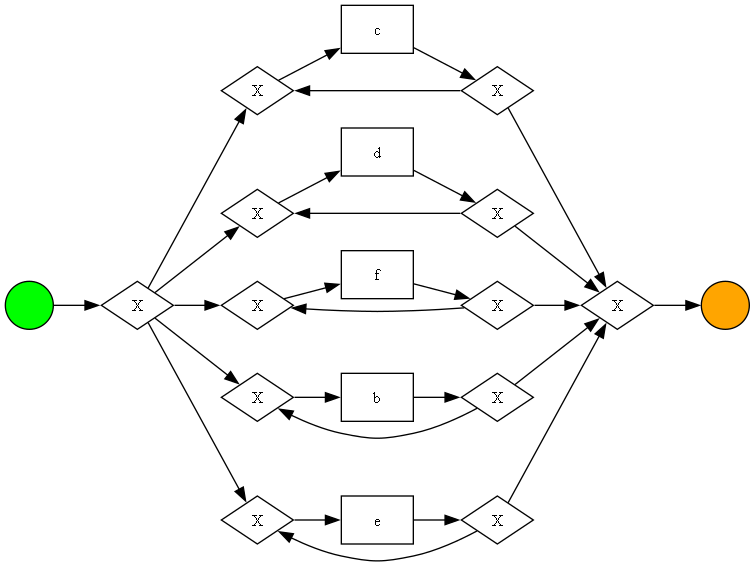

In [10]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

# Ensure the required columns exist
required_columns = ['caseid', 'activity', 'start_datetime']
for col in required_columns:
    if col not in log.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame")

# Ensure datetime columns are in the correct format
log['start_datetime'] = pd.to_datetime(log['start_datetime'])
log['end_datetime'] = pd.to_datetime(log['end_datetime'])

# Sort the dataframe
log = log.sort_values('start_datetime')

# Convert DataFrame to event log format
dataframe = pm4py.format_dataframe(log, case_id='caseid', activity_key='activity', timestamp_key='start_datetime')
event_log = pm4py.convert_to_event_log(dataframe)

# Discover BPMN model
bpmn_model = pm4py.discover_bpmn_inductive(event_log)

# Visualize the BPMN model
bpmn_gviz = bpmn_visualizer.apply(bpmn_model)

filedest = "data/bpmn_diagram.png"

# Save the diagram as an image file (e.g., PNG)
bpmn_visualizer.save(bpmn_gviz, filedest)

# Display the image in the notebook
from IPython.display import display, Image
display(Image(filename=filedest))

# Variant analysis
Heres an example superficial analysis of the variants created in the event-log.

Number of variants: 36
Total cases: 1000
Unique variants: 36
Variant coverage (top 5): 63.30%


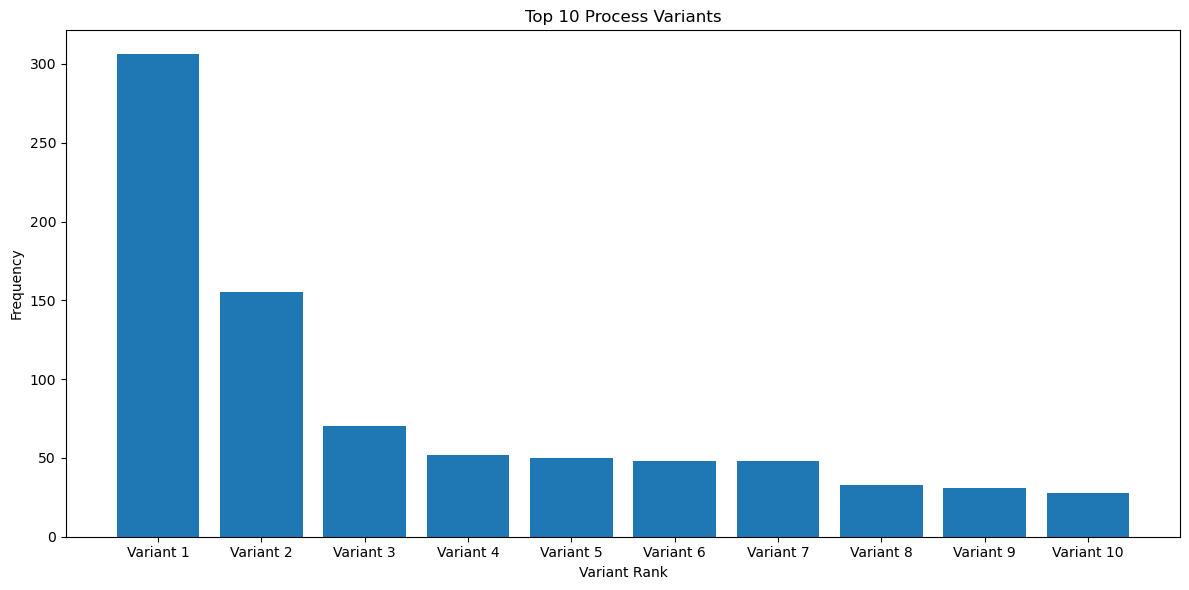


Top 5 most frequent variants:
1. Frequency: 306
   Activities: f

2. Frequency: 155
   Activities: f -> f

3. Frequency: 70
   Activities: f -> f -> f

4. Frequency: 52
   Activities: c

5. Frequency: 50
   Activities: b



In [11]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.filtering.log.variants import variants_filter


# Get process variants
variants = variants_filter.get_variants(event_log)

# Print the number of variants
print(f"Number of variants: {len(variants)}")


import pm4py
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to extract activity sequence from a variant
def get_activity_sequence(variant):
    if isinstance(variant, tuple) and len(variant) == 1:
        # Single activity variant
        return variant
    elif isinstance(variant, tuple) and all(isinstance(item, tuple) for item in variant):
        # Multi-activity variant
        return tuple(activity for activity, _ in variant)
    else:
        # Unexpected format, return as is
        return variant

# Extract and count variants
variant_counts = Counter()
for variant, traces in variants.items():
    activity_sequence = get_activity_sequence(variant)
    variant_counts[activity_sequence] = len(traces)

# Convert to DataFrame for easier analysis
df_variants = pd.DataFrame(list(variant_counts.items()), columns=['Variant', 'Frequency'])
df_variants = df_variants.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Calculate some statistics
total_cases = sum(df_variants['Frequency'])
unique_variants = len(df_variants)
top_5_coverage = df_variants['Frequency'].head(5).sum() / total_cases

# Print statistics
print(f"Total cases: {total_cases}")
print(f"Unique variants: {unique_variants}")
print(f"Variant coverage (top 5): {top_5_coverage:.2%}")

# Visualize top 10 variants
plt.figure(figsize=(12, 6))
plt.bar(range(10), df_variants['Frequency'].head(10))
plt.title('Top 10 Process Variants')
plt.xlabel('Variant Rank')
plt.ylabel('Frequency')
plt.xticks(range(10), [f"Variant {i+1}" for i in range(10)])
plt.tight_layout()
plt.show()

# Print details of top 5 variants
print("\nTop 5 most frequent variants:")
for i, (variant, freq) in enumerate(df_variants.head(5).itertuples(index=False), 1):
    print(f"{i}. Frequency: {freq}")
    print(f"   Activities: {' -> '.join(str(v) for v in variant)}")
    print()